In [15]:
import json
import pandas as pd
import plotly.express as px

In [84]:
from urllib.request import urlopen

In [85]:
with urlopen('https://raw.githubusercontent.com/akbartus/GeoJSON-Uzbekistan/main/geojson/uzbekistan_regional.geojson') as response:
    regions = json.load(response)

In [30]:
uzb_regions = json.load(open("map.geojson", 'r', encoding="utf-8"))

In [62]:
uzb_regions['features'][9]["properties"]['ADM1_EN'] = 'Kashkadarya region'

In [76]:
uzb_regions['features'][3]["properties"]['ADM1_EN'] = "Ferghana region"

In [132]:
uzb_regions['features'][13]["id"]

'Republic of Karakalpakstan'

In [77]:
state_id = {}
for feature in uzb_regions['features']:
    feature['id'] = feature['properties']['ADM1_EN']
    state_id[feature['properties']['ADM1_EN']] = feature['id']

In [11]:
df = pd.read_csv("hiv_data_regions.csv")

In [41]:
df = df.drop(index=0)

In [143]:
uzb_regions['features'][0]['properties']

{'ADM1_EN': 'Tashkent city',
 'ADM1_RU': 'г. Ташкент',
 'ADM1_UZ': 'Toshkent sh.'}

In [78]:
df["id"] = df['Name of the regions'].apply(lambda x: state_id[x])

In [79]:
df

Name of the regions  per 100 000 population  \
1   Republic of Karakalpakstan                     4.4   
2               Andijan region                    11.5   
3               Bukhara region                     4.9   
4               Jizzakh region                     6.2   
5           Kashkadarya region                     4.3   
6                 Navoi region                     4.1   
7              Namangan region                     6.0   
8             Samarkand region                     8.4   
9          Surkhandarya region                     7.0   
10             Syrdarya region                    14.3   
11             Tashkent region                    15.9   
12             Ferghana region                     7.8   
13              Khorezm region                    10.9   
14               Tashkent city                    18.7   

                            id  
1   Republic of Karakalpakstan  
2               Andijan region  
3               Bukhara region  
4               Jizzakh region  
5           Kashkadarya region  
6                 Navoi region  
7              Namangan region  
8             Samarkand region  
9          Surkhandarya region  
10             Syrdarya region  
11             Tashkent region  
12             Ferghana region  
13              Khorezm region  
14               Tashkent city

In [203]:
fig = px.choropleth(df, locations = df['id'], featureidkey = 'features.properties.ADM1_EN', geojson = uzb_regions, color = df['per 100 000 population'])
#fig.update_geos(fitbounds = "locations", visible = False)
fig.show()

In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
data = gpd.read_file('https://raw.githubusercontent.com/akbartus/GeoJSON-Uzbekistan/main/geojson/uzbekistan_regional.geojson')

<AxesSubplot:>

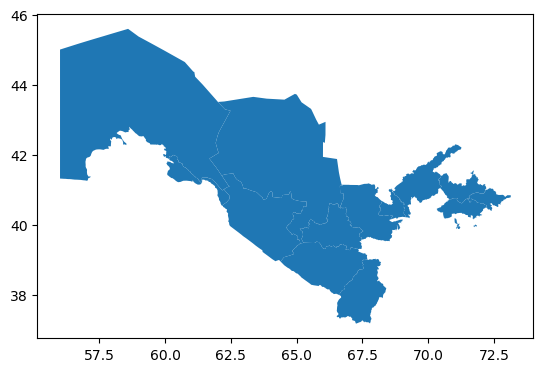

In [125]:
data.plot()

In [146]:
from urllib.request import urlopen

In [147]:
import json
with urlopen('https://raw.githubusercontent.com/akbartus/GeoJSON-Uzbekistan/main/geojson/uzbekistan_regional.geojson') as response:
    regions = json.load(response)

In [148]:
import geopandas as gpd

In [149]:
data = gpd.read_file('https://raw.githubusercontent.com/akbartus/GeoJSON-Uzbekistan/main/geojson/uzbekistan_regional.geojson')

In [175]:
df

Name of the regions  per 100 000 population  \
1   Republic of Karakalpakstan                     4.4   
2               Andijan region                    11.5   
3               Bukhara region                     4.9   
4               Jizzakh region                     6.2   
5           Kashkadarya region                     4.3   
6                 Navoi region                     4.1   
7              Namangan region                     6.0   
8             Samarkand region                     8.4   
9          Surkhandarya region                     7.0   
10             Syrdarya region                    14.3   
11             Tashkent region                    15.9   
12             Ferghana region                     7.8   
13              Khorezm region                    10.9   
14               Tashkent city                    18.7   

                            id  
1   Republic of Karakalpakstan  
2               Andijan region  
3               Bukhara region  
4               Jizzakh region  
5           Kashkadarya region  
6                 Navoi region  
7              Namangan region  
8             Samarkand region  
9          Surkhandarya region  
10             Syrdarya region  
11             Tashkent region  
12             Ferghana region  
13              Khorezm region  
14               Tashkent city

In [182]:
gdf = pd.merge(data, df, left_on = 'ADM1_EN', right_on = 'Name of the regions')

In [194]:
gdf.set_index('id', inplace=True)

In [196]:
gdf.index

Index(['Tashkent city', 'Namangan region', 'Tashkent region',
       'Ferghana region', 'Andijan region', 'Syrdarya region',
       'Jizzakh region', 'Navoi region', 'Samarkand region',
       'Kashkadarya region', 'Surkhandarya region', 'Bukhara region',
       'Khorezm region', 'Republic of Karakalpakstan'],
      dtype='object', name='id')

In [201]:
fig = px.choropleth_mapbox(gdf, 
                          geojson=gdf['geometry'],
                          locations = gdf.index,
                          color = 'per 100 000 population',
                          mapbox_style="open-street-map",
                          featureidkey = 'ADM1_EN')

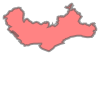

In [205]:
gdf['geometry'].iloc[1]

In [209]:
import folium

In [266]:
m = folium.Map(location=[42, 65], zoom_start=5.5)

In [267]:
folium.Choropleth(
    geo_data=gdf,
    name="choropleth",
    data=gdf,
    columns= ["ADM1_EN","per 100 000 population"],
    key_on="feature.properties.ADM1_EN",
    fill_color="OrRd",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="Number of HIV infections per 100000 population, 2021").add_to(m)

In [268]:
m